In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#1. Data Preparation:


In [2]:
heart=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
heart.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

#2. Exploratory Data Analysis (EDA):

In [3]:
heart.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [4]:
heart.rename(columns={'cp':'Chest_pain','trestbps':'blood_pressure','chol':'cholesterol','fbs':'fasting_blood_sugar','thalch':'max_heart_rate'},inplace=True)
heart.head()

age   sex       Chest_pain  blood_pressure  cholesterol  \
0   63  Male   typical angina             145          233   
1   41  Male  atypical angina             135          203   
2   57  Male     asymptomatic             140          192   
3   52  Male   typical angina             118          186   
4   57  Male     asymptomatic             110          201   

   fasting_blood_sugar         restecg  max_heart_rate  exang  oldpeak  \
0                 True  lv hypertrophy             150  False      2.3   
1                False          normal             132  False      0.0   
2                False          normal             148  False      0.4   
3                False  lv hypertrophy             190  False      0.0   
4                False          normal             126   True      1.5   

         slope          thal  num  
0  downsloping  fixed defect    0  
1         flat  fixed defect    0  
2         flat  fixed defect    0  
3         flat  fixed defect    0  
4         flat  fixed defect    0

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  908 non-null    int64  
 1   sex                  908 non-null    object 
 2   Chest_pain           908 non-null    object 
 3   blood_pressure       908 non-null    int64  
 4   cholesterol          908 non-null    int64  
 5   fasting_blood_sugar  908 non-null    bool   
 6   restecg              908 non-null    object 
 7   max_heart_rate       908 non-null    int64  
 8   exang                908 non-null    object 
 9   oldpeak              846 non-null    float64
 10  slope                908 non-null    object 
 11  thal                 908 non-null    object 
 12  num                  908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
heart.isnull().sum()

age                     0
sex                     0
Chest_pain              0
blood_pressure          0
cholesterol             0
fasting_blood_sugar     0
restecg                 0
max_heart_rate          0
exang                   0
oldpeak                62
slope                   0
thal                    0
num                     0
dtype: int64

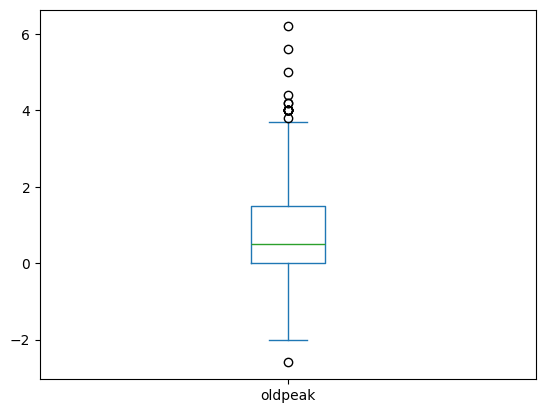

In [7]:
heart['oldpeak'].plot(kind='box')
plt.show()

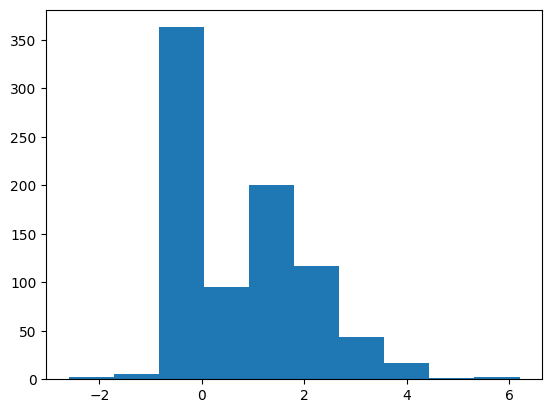

In [8]:
plt.hist(heart['oldpeak'])
plt.show()

In [9]:
heart['oldpeak'].fillna(heart['oldpeak'].mean(),inplace=True)

In [10]:
heart.isnull().sum()

age                    0
sex                    0
Chest_pain             0
blood_pressure         0
cholesterol            0
fasting_blood_sugar    0
restecg                0
max_heart_rate         0
exang                  0
oldpeak                0
slope                  0
thal                   0
num                    0
dtype: int64

#3. Feature Engineering:


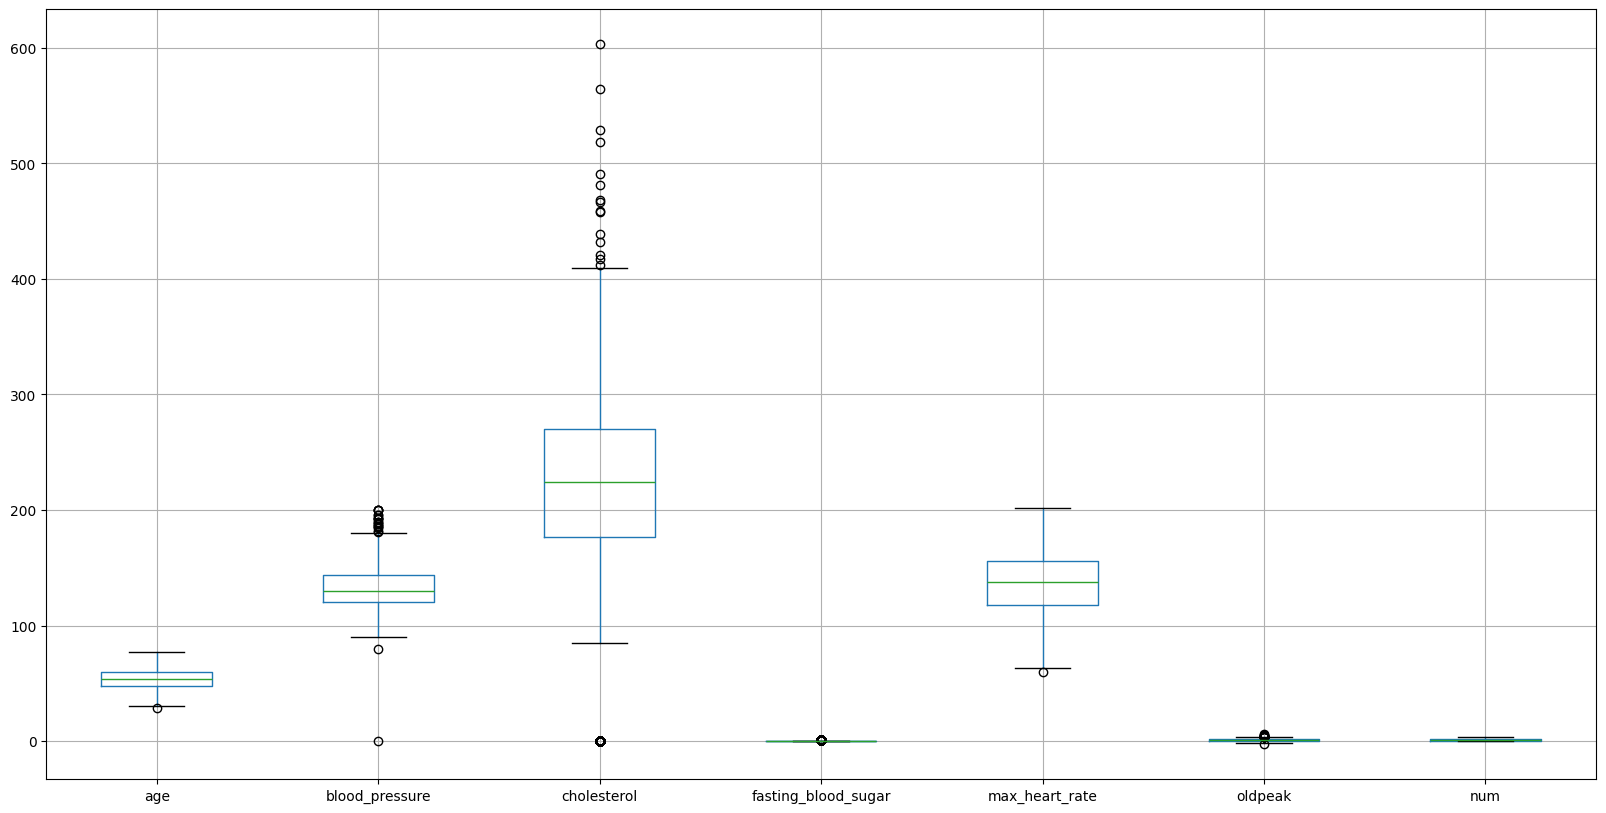

In [11]:
heart.boxplot(figsize=(20,10))
plt.show()

In [12]:
# Convert 'exang' column to a consistent data type (string) before applying LabelEncoder
heart['exang']=heart['exang'].astype(str)

In [13]:
lable=LabelEncoder()
heart['sex']= lable.fit_transform(heart['sex'])
heart['Chest_pain']=lable.fit_transform(heart['Chest_pain'])
heart['fasting_blood_sugar']= lable.fit_transform(heart['fasting_blood_sugar'])
heart['restecg']=lable.fit_transform(heart['restecg'])
heart['exang']=lable.fit_transform(heart['exang'])
heart['slope']=lable.fit_transform(heart['slope'])
heart['thal']=lable.fit_transform(heart['thal'])
heart.head()

age  sex  Chest_pain  blood_pressure  cholesterol  fasting_blood_sugar  \
0   63    1           3             145          233                    1   
1   41    1           1             135          203                    0   
2   57    1           0             140          192                    0   
3   52    1           3             118          186                    0   
4   57    1           0             110          201                    0   

   restecg  max_heart_rate  exang  oldpeak  slope  thal  num  
0        0             150      1      2.3      0     0    0  
1        1             132      1      0.0      1     0    0  
2        1             148      1      0.4      1     0    0  
3        0             190      1      0.0      1     0    0  
4        1             126      3      1.5      1     0    0

In [14]:
heart.describe()

age         sex  Chest_pain  blood_pressure  cholesterol  \
count  908.000000  908.000000  908.000000      908.000000   908.000000   
mean    53.791850    0.790749    0.777533      133.430617   201.484581   
std      9.158031    0.406998    0.958374       20.401608   112.097949   
min     29.000000    0.000000    0.000000        0.000000     0.000000   
25%     47.750000    1.000000    0.000000      120.000000   176.750000   
50%     54.000000    1.000000    0.000000      130.000000   224.000000   
75%     60.000000    1.000000    2.000000      144.000000   270.000000   
max     77.000000    1.000000    3.000000      200.000000   603.000000   

       fasting_blood_sugar     restecg  max_heart_rate       exang  \
count           908.000000  908.000000      908.000000  908.000000   
mean              0.203744    0.991189      135.957048    1.761013   
std               0.403003    0.635177       26.804929    0.983401   
min               0.000000    0.000000       60.000000    0.000000   
25%               0.000000    1.000000      118.000000    1.000000   
50%               0.000000    1.000000      138.000000    1.000000   
75%               0.000000    1.000000      156.000000    3.000000   
max               1.000000    2.000000      202.000000    3.000000   

          oldpeak       slope        thal         num  
count  908.000000  908.000000  908.000000  908.000000  
mean     0.891253    1.155286    1.187225    1.008811  
std      1.055826    0.691023    0.735141    1.144436  
min     -2.600000    0.000000    0.000000    0.000000  
25%      0.000000    1.000000    1.000000    0.000000  
50%      0.800000    1.000000    1.000000    1.000000  
75%      1.500000    2.000000    2.000000    2.000000  
max      6.200000    2.000000    2.000000    4.000000

In [15]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  908 non-null    int64  
 1   sex                  908 non-null    int64  
 2   Chest_pain           908 non-null    int64  
 3   blood_pressure       908 non-null    int64  
 4   cholesterol          908 non-null    int64  
 5   fasting_blood_sugar  908 non-null    int64  
 6   restecg              908 non-null    int64  
 7   max_heart_rate       908 non-null    int64  
 8   exang                908 non-null    int64  
 9   oldpeak              908 non-null    float64
 10  slope                908 non-null    int64  
 11  thal                 908 non-null    int64  
 12  num                  908 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 92.3 KB


In [16]:
q1=heart['oldpeak'].quantile(0.25)
q3=heart['oldpeak'].quantile(0.75)
iqr=q3-q1

In [17]:
upper=q3+1.5*iqr
lower=q1-1.5*iqr

In [18]:
upper

np.float64(3.75)

In [19]:
lower

np.float64(-2.25)

In [20]:
he=heart[(heart['oldpeak']<upper) & (heart['oldpeak']>lower)]

In [21]:
he

age  sex  Chest_pain  blood_pressure  cholesterol  fasting_blood_sugar  \
0     63    1           3             145          233                    1   
1     41    1           1             135          203                    0   
2     57    1           0             140          192                    0   
3     52    1           3             118          186                    0   
4     57    1           0             110          201                    0   
..   ...  ...         ...             ...          ...                  ...   
903   53    1           0             125            0                    0   
904   62    1           0             166          170                    0   
905   56    1           2             170            0                    0   
906   56    1           2             144          208                    1   
907   57    1           0             142          277                    1   

     restecg  max_heart_rate  exang   oldpeak  slope  thal  num  
0          0             150      1  2.300000      0     0    0  
1          1             132      1  0.000000      1     0    0  
2          1             148      1  0.400000      1     0    0  
3          0             190      1  0.000000      1     0    0  
4          1             126      3  1.500000      1     0    0  
..       ...             ...    ...       ...    ...   ...  ...  
903        1             120      1  1.500000      2     2    4  
904        2             120      3  3.000000      1     2    4  
905        0             123      3  2.500000      0     1    4  
906        2             105      2  0.891253      0     0    4  
907        2             182      0  0.891253      1     2    4  

[892 rows x 13 columns]

In [22]:

heart[heart['oldpeak']>3.75].shape[0]

15

In [23]:
heart[heart['oldpeak']<-2.25]

age  sex  Chest_pain  blood_pressure  cholesterol  fasting_blood_sugar  \
525   46    1           0             100            0                    0   

     restecg  max_heart_rate  exang  oldpeak  slope  thal  num  
525        2             133      1     -2.6      1     1    1

In [24]:
heart.loc[heart['oldpeak']>3.75,'oldpeak'] = 3.75

In [25]:
heart.loc[heart['oldpeak']<-2.25,'oldpeak'] = -2.25

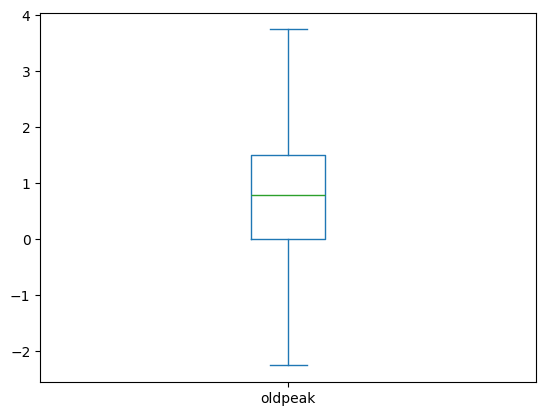

In [26]:
heart['oldpeak'].plot(kind='box')
plt.show()

In [27]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1

    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)

    return print('lower_extreme:-',lower_extreme,', upper_extreme:-',upper_extreme,', q1:-',q1,', q3:-',q3)


In [28]:
outlier_detection(heart,'age')
heart.loc[heart['age']>78.375,'age'] = 78.375
heart.loc[heart['age']<  29.375,'age'] = 29.375

lower_extreme:- 29.375 , upper_extreme:- 78.375 , q1:- 47.75 , q3:- 60.0


In [29]:
outlier_detection(heart,'blood_pressure')
heart.loc[heart['blood_pressure']> 180.0,'blood_pressure'] = 180.0
heart.loc[heart['blood_pressure']< 84.0,'blood_pressure'] = 84.0

lower_extreme:- 84.0 , upper_extreme:- 180.0 , q1:- 120.0 , q3:- 144.0


In [30]:
outlier_detection(heart,'cholesterol')
heart.loc[heart['cholesterol']> 409.875,'cholesterol'] = 409.875
heart.loc[heart['cholesterol']< 36.875,'cholesterol'] = 36.875

lower_extreme:- 36.875 , upper_extreme:- 409.875 , q1:- 176.75 , q3:- 270.0


In [31]:
outlier_detection(heart,'max_heart_rate')
heart.loc[heart['max_heart_rate']> 213.0,'max_heart_rate'] = 213.0
heart.loc[heart['max_heart_rate']< 61.0,'max_heart_rate'] = 61.0

lower_extreme:- 61.0 , upper_extreme:- 213.0 , q1:- 118.0 , q3:- 156.0


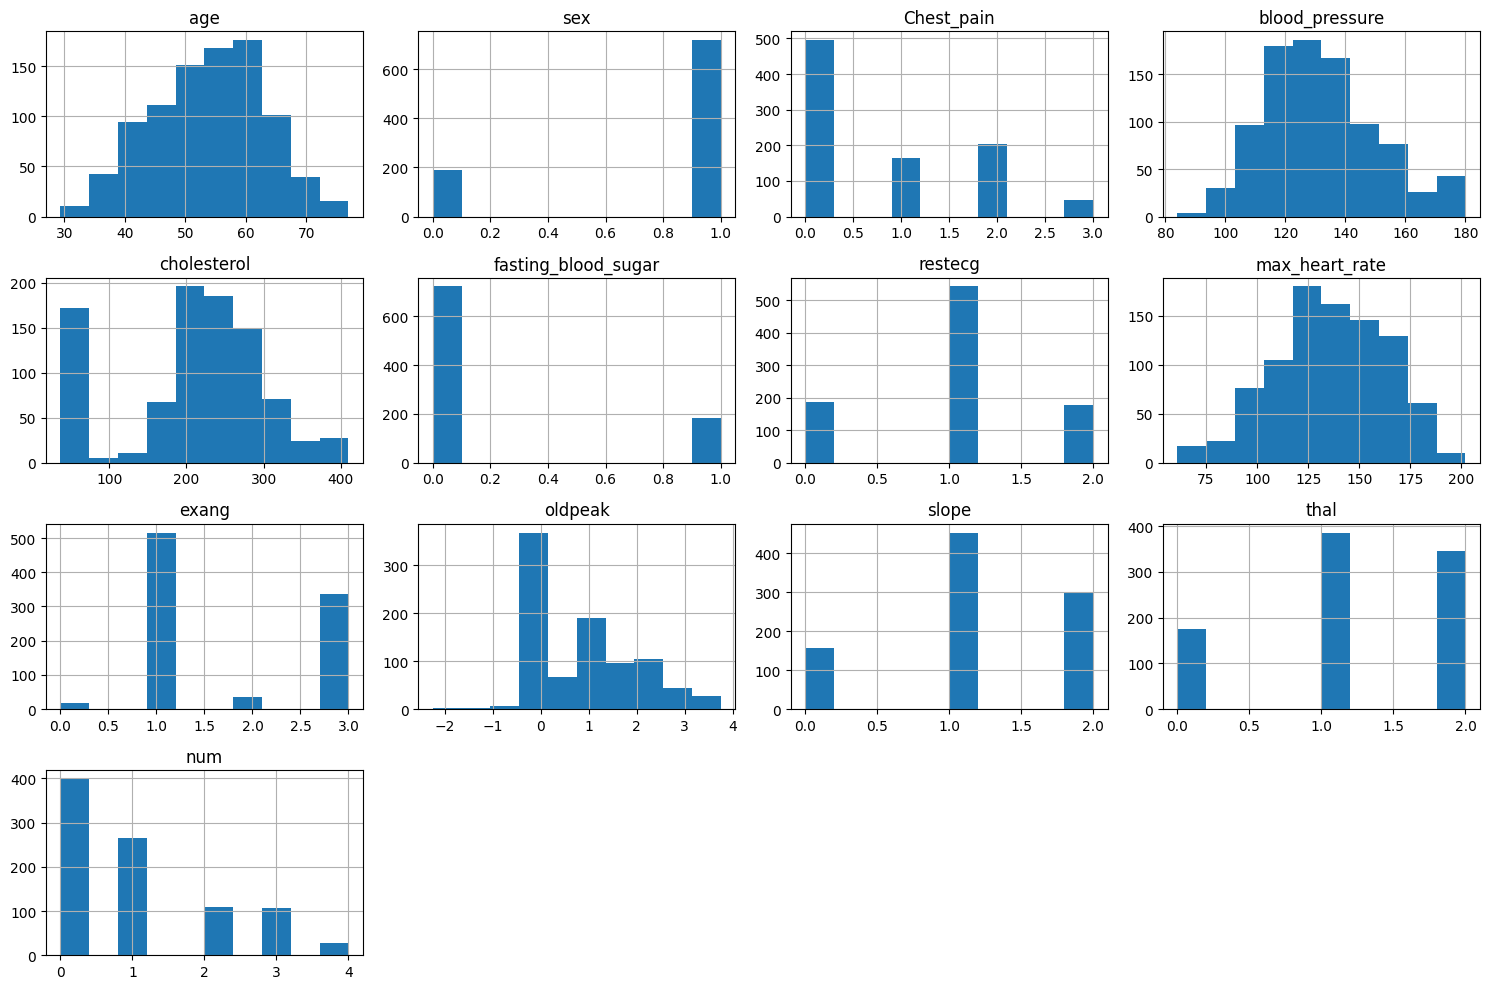

In [32]:
heart.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

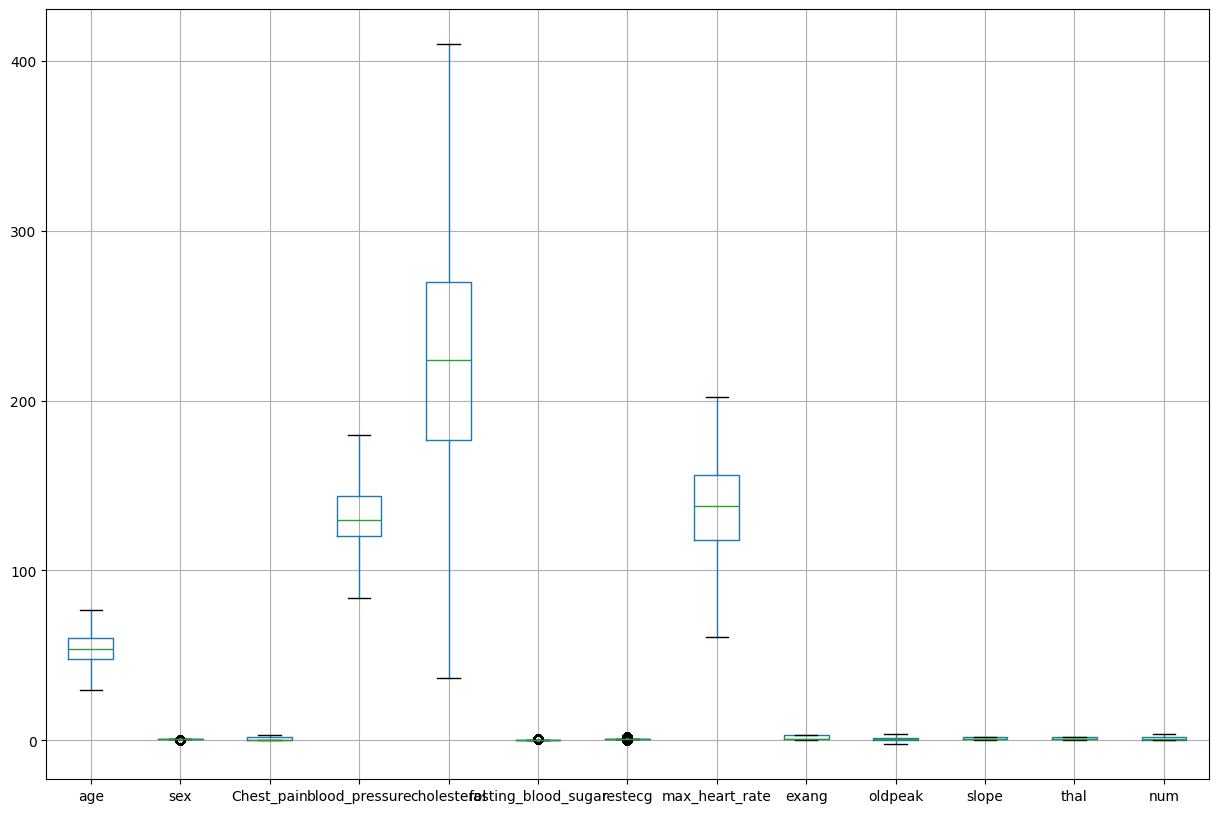

In [33]:
heart.boxplot(figsize=(15,10))
plt.show()

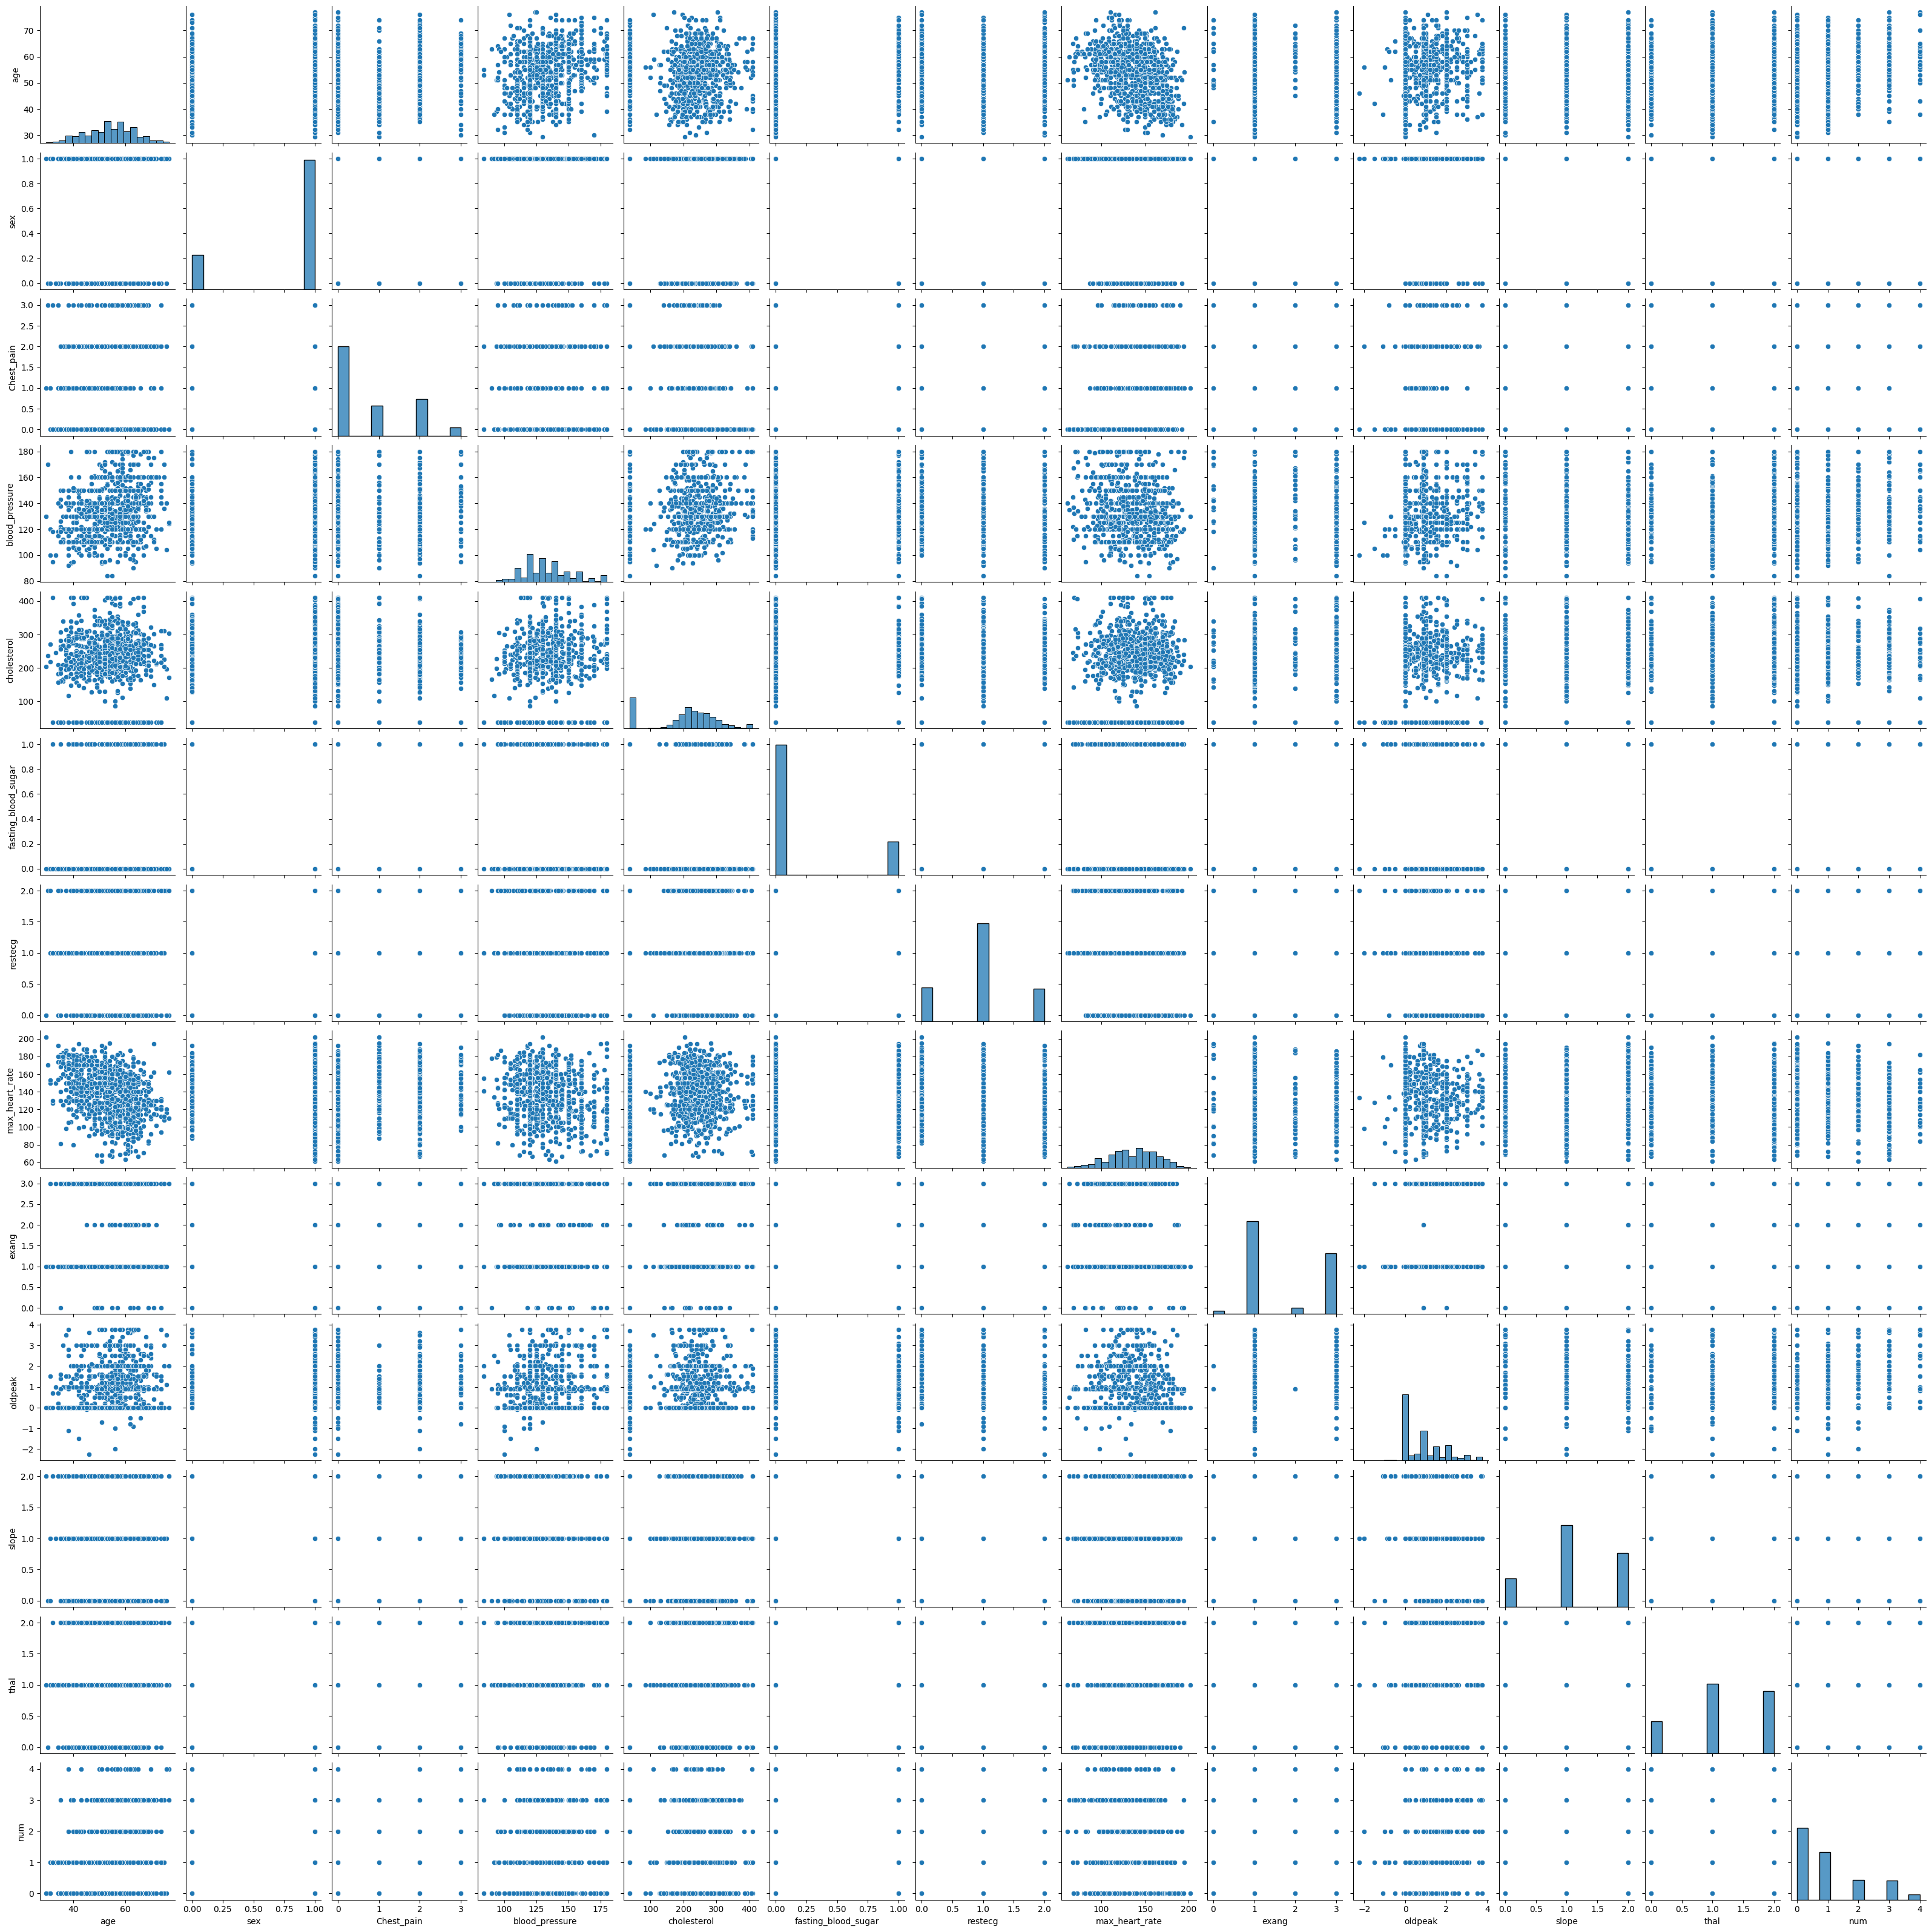

In [34]:
sns.pairplot(heart)
plt.show()

In [35]:
heart.corr()

age       sex  Chest_pain  blood_pressure  \
age                  1.000000  0.052224   -0.067587        0.262066   
sex                  0.052224  1.000000   -0.125130        0.019198   
Chest_pain          -0.067587 -0.125130    1.000000        0.012528   
blood_pressure       0.262066  0.019198    0.012528        1.000000   
cholesterol         -0.092411 -0.194489    0.061485        0.126479   
fasting_blood_sugar  0.176701  0.092167   -0.045228        0.112497   
restecg             -0.007589  0.078158   -0.072048        0.057852   
max_heart_rate      -0.328068 -0.178794    0.248206       -0.131777   
exang                0.154950  0.161403   -0.358294        0.104120   
oldpeak              0.236076  0.107685   -0.170391        0.158682   
slope               -0.054596 -0.045065    0.092177        0.009184   
thal                 0.058686  0.068439   -0.080093        0.064021   
num                  0.326493  0.259605   -0.312848        0.142645   

                     cholesterol  fasting_blood_sugar   restecg  \
age                    -0.092411             0.176701 -0.007589   
sex                    -0.194489             0.092167  0.078158   
Chest_pain              0.061485            -0.045228 -0.072048   
blood_pressure          0.126479             0.112497  0.057852   
cholesterol             1.000000            -0.112116 -0.193553   
fasting_blood_sugar    -0.112116             1.000000  0.067320   
restecg                -0.193553             0.067320  1.000000   
max_heart_rate          0.194575            -0.065456 -0.195220   
exang                  -0.029156             0.000591  0.046048   
oldpeak                 0.030557             0.027017 -0.030497   
slope                   0.048489            -0.026636 -0.084796   
thal                   -0.015627            -0.017255 -0.112161   
num                    -0.228308             0.156268  0.036508   

                     max_heart_rate     exang   oldpeak     slope      thal  \
age                       -0.328068  0.154950  0.236076 -0.054596  0.058686   
sex                       -0.178794  0.161403  0.107685 -0.045065  0.068439   
Chest_pain                 0.248206 -0.358294 -0.170391  0.092177 -0.080093   
blood_pressure            -0.131777  0.104120  0.158682  0.009184  0.064021   
cholesterol                0.194575 -0.029156  0.030557  0.048489 -0.015627   
fasting_blood_sugar       -0.065456  0.000591  0.027017 -0.026636 -0.017255   
restecg                   -0.195220  0.046048 -0.030497 -0.084796 -0.112161   
max_heart_rate             1.000000 -0.309552 -0.131976  0.224065  0.006162   
exang                     -0.309552  1.000000  0.377275 -0.162736  0.090937   
oldpeak                   -0.131976  0.377275  1.000000 -0.179202  0.090112   
slope                      0.224065 -0.162736 -0.179202  1.000000  0.044712   
thal                       0.006162  0.090937  0.090112  0.044712  1.000000   
num                       -0.323060  0.341811  0.416884 -0.148117  0.127775   

                          num  
age                  0.326493  
sex                  0.259605  
Chest_pain          -0.312848  
blood_pressure       0.142645  
cholesterol         -0.228308  
fasting_blood_sugar  0.156268  
restecg              0.036508  
max_heart_rate      -0.323060  
exang                0.341811  
oldpeak              0.416884  
slope               -0.148117  
thal                 0.127775  
num                  1.000000

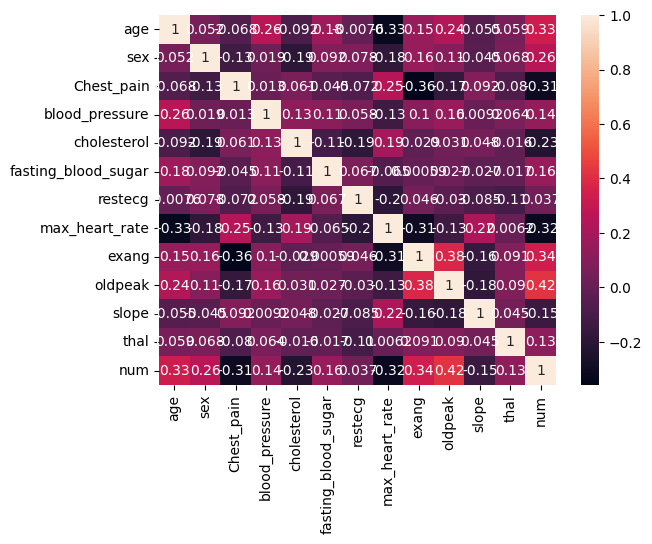

In [36]:
sns.heatmap(heart.corr(),annot=True)
plt.show()

#4. Decision Tree Classification:

In [37]:
X=heart.drop(columns=['num'])
y=heart['num']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(726, 12) (182, 12) (726,) (182,)


In [40]:
x_train

age  sex  Chest_pain  blood_pressure  cholesterol  fasting_blood_sugar  \
84   42.0    1           1             120      295.000                    0   
10   30.0    0           3             170      237.000                    0   
617  74.0    1           2             140      237.000                    1   
250  41.0    1           0             104       36.875                    0   
869  49.0    1           2             137      142.000                    0   
..    ...  ...         ...             ...          ...                  ...   
106  63.0    0           2             135      252.000                    0   
270  37.0    0           1             120      260.000                    0   
860  48.0    1           0             140      374.000                    0   
435  57.0    1           1             154      232.000                    0   
102  60.0    0           3             150      240.000                    0   

     restecg  max_heart_rate  exang   oldpeak  slope  thal  
84         1             162      1  0.000000      2     1  
10         2             170      1  0.000000      0     0  
617        1              94      1  0.000000      2     2  
250        2             111      1  0.000000      1     1  
869        1              68      0  0.891253      1     1  
..       ...             ...    ...       ...    ...   ...  
106        0             172      1  0.000000      2     1  
270        1             130      1  0.000000      0     0  
860        1             159      3  1.500000      2     2  
435        0             164      1  0.000000      2     1  
102        1             171      1  0.900000      2     1  

[726 rows x 12 columns]

In [41]:
x_test

age  sex  Chest_pain  blood_pressure  cholesterol  fasting_blood_sugar  \
865  63.0    1           2             130       36.875                    0   
439  58.0    1           0             170       36.875                    1   
342  41.0    1           1             120      291.000                    0   
736  61.0    1           0             146      241.000                    0   
785  54.0    1           0             110      206.000                    0   
..    ...  ...         ...             ...          ...                  ...   
580  52.0    1           0             140      266.000                    0   
868  65.0    1           0             126      312.000                    0   
445  53.0    1           0             140      203.000                    1   
786  54.0    1           0             122      286.000                    0   
25   45.0    0           1             112      160.000                    0   

     restecg  max_heart_rate  exang   oldpeak  slope  thal  
865        2             111      3  0.000000      1     2  
439        2             105      3  0.000000      0     1  
342        2             160      1  0.000000      0     1  
736        1             148      3  3.000000      0     0  
785        0             108      3  0.000000      1     1  
..       ...             ...    ...       ...    ...   ...  
580        1             134      3  2.000000      1     0  
868        0             156      0  0.891253      0     1  
445        0             155      3  3.100000      0     2  
786        0             116      3  3.200000      1     1  
25         1             138      1  0.000000      1     1  

[182 rows x 12 columns]

In [42]:
y_train

84     0
10     0
617    1
250    0
869    3
      ..
106    0
270    0
860    3
435    1
102    0
Name: num, Length: 726, dtype: int64

In [43]:
y_test

865    3
439    1
342    0
736    2
785    3
      ..
580    1
868    3
445    1
786    3
25     0
Name: num, Length: 182, dtype: int64

#5. Hyperparameter Tuning:

In [44]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}


In [45]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

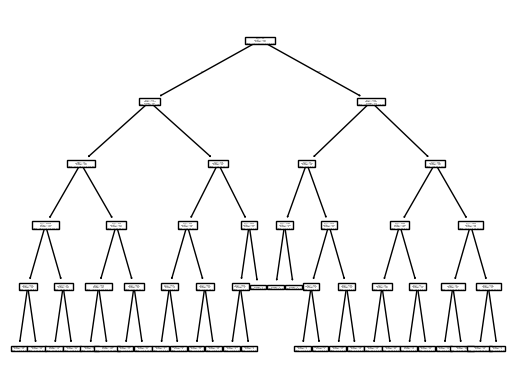

In [47]:
tree.plot_tree(model)
plt.show()

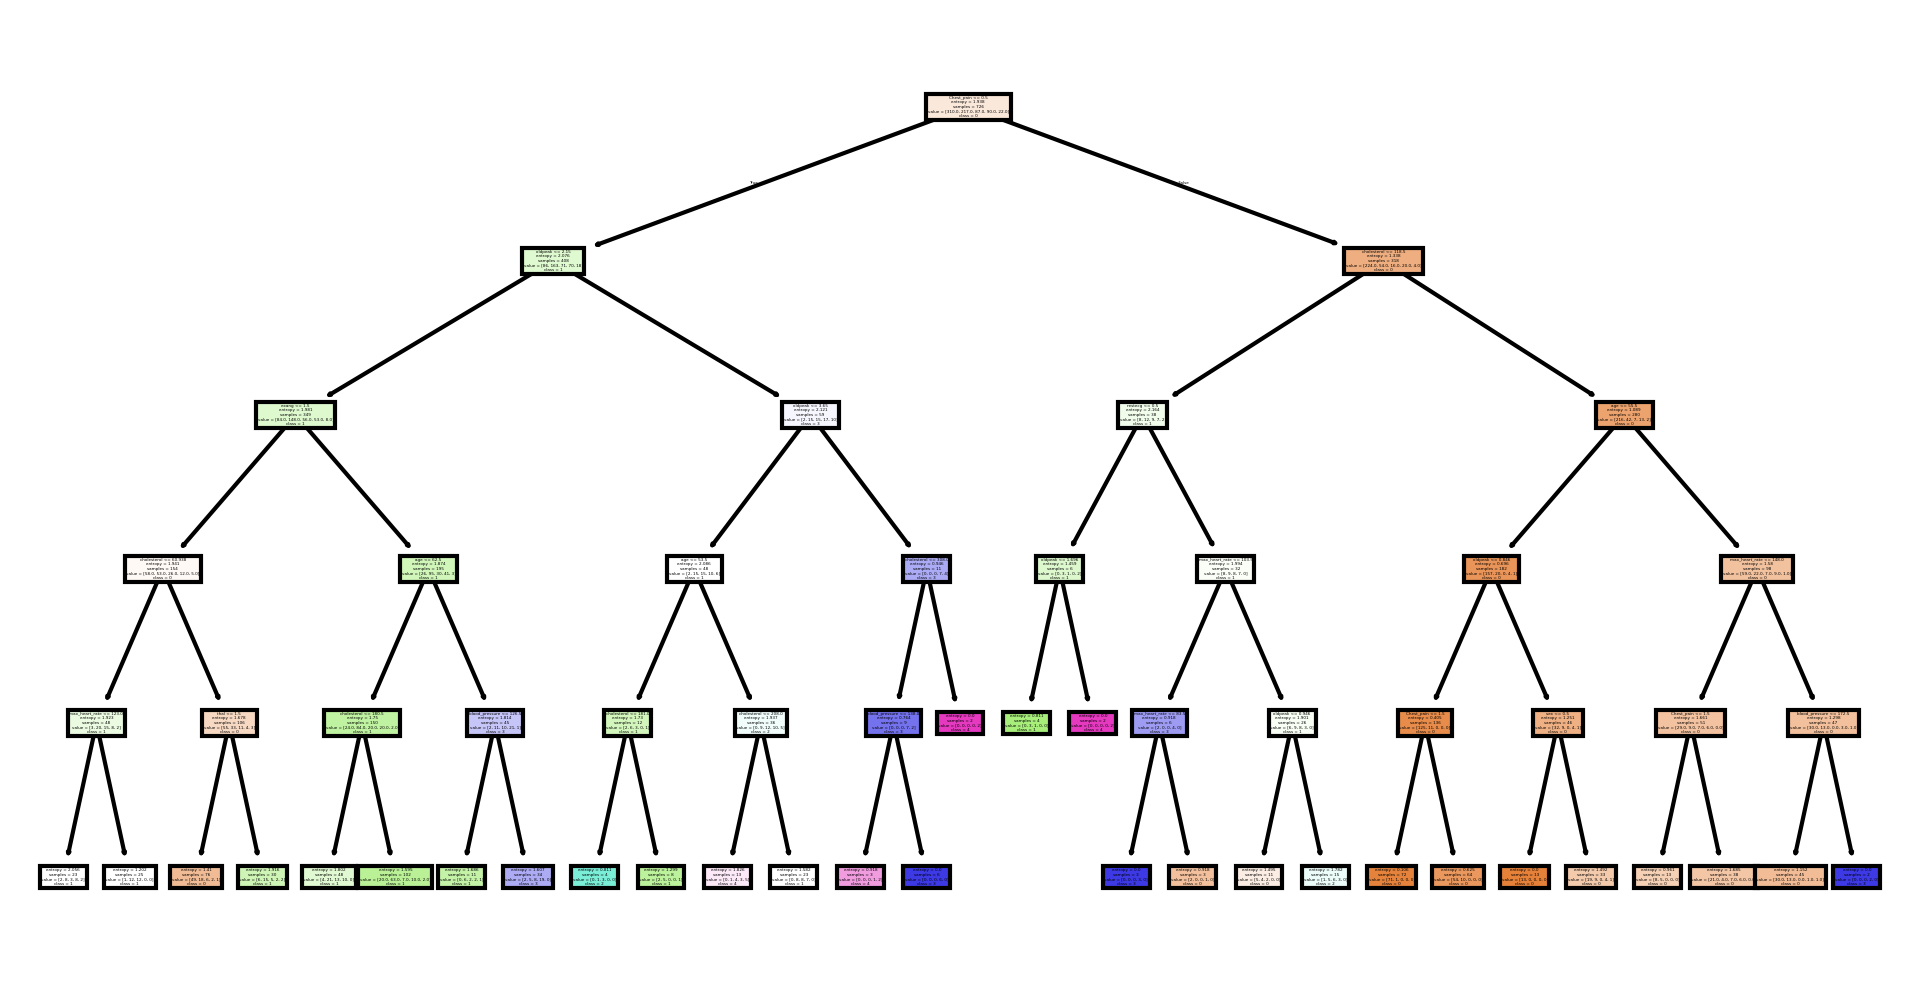

In [48]:
fn=['age',	'sex',	'Chest_pain',	'blood_pressure',	'cholesterol',	'fasting_blood_sugar',	'restecg',	'max_heart_rate',	'exang',	'oldpeak',	'slope',	'thal'] # Feature names
cn=['0','1','2','3','4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [49]:
pred=model.predict(x_test)
pd.Series(pred).value_counts()

0    107
1     68
3      5
2      2
Name: count, dtype: int64

In [50]:
pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 1, 1, 3, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 3, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3,
       1, 1, 0, 1, 1, 0])

In [51]:
y_test

865    3
439    1
342    0
736    2
785    3
      ..
580    1
868    3
445    1
786    3
25     0
Name: num, Length: 182, dtype: int64

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.38      0.54      0.45        48
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.22      0.28      0.24       182
weighted avg       0.45      0.56      0.50       182



In [53]:
confusion_matrix(y_test,pred)

array([[76, 11,  1,  1,  0],
       [19, 26,  0,  3,  0],
       [ 6, 15,  0,  1,  0],
       [ 5, 11,  1,  0,  0],
       [ 1,  5,  0,  0,  0]])

In [54]:
np.mean(pred==y_test)

np.float64(0.5604395604395604)

In [55]:
accuracy_score(y_test,pred)

0.5604395604395604

In [56]:
model.score(x_test,y_test)

0.5604395604395604

In [57]:
model_gini= DecisionTreeClassifier(criterion = 'gini',max_depth=5,min_samples_split= 5)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

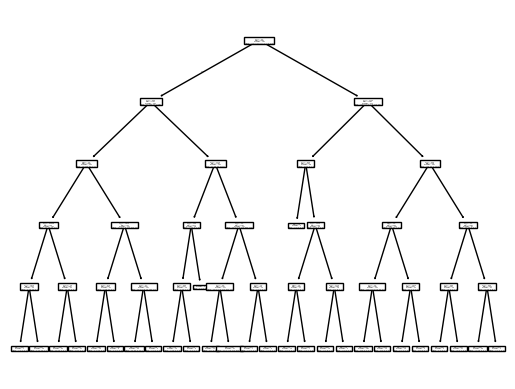

In [58]:
tree.plot_tree(model_gini)
plt.show()

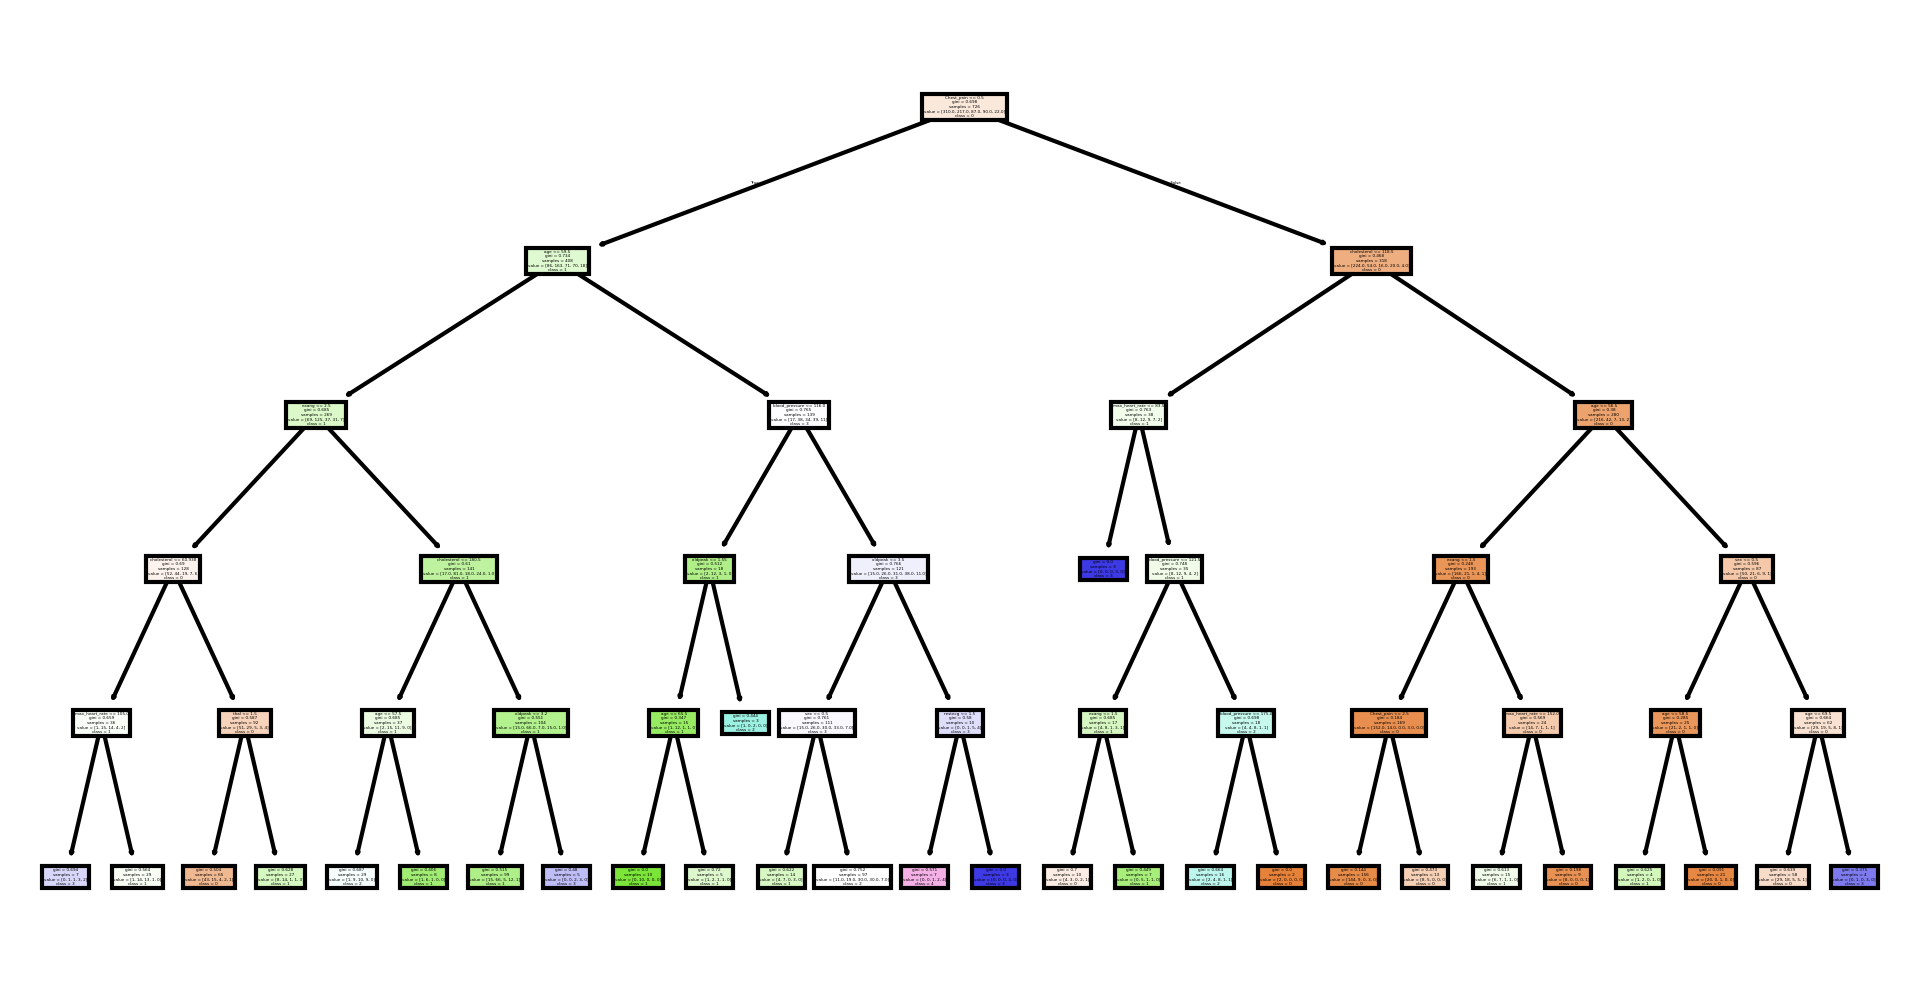

In [59]:

fn=['age',	'sex',	'Chest_pain',	'blood_pressure',	'cholesterol',	'fasting_blood_sugar',	'restecg',	'max_heart_rate',	'exang',	'oldpeak',	'slope',	'thal'] # Feature names
cn=['0','1','2','3','4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn,
               class_names=cn,
               filled = True);


In [60]:
preds=model_gini.predict(x_test)
np.mean(preds==y_test)

np.float64(0.5439560439560439)

In [61]:
preds

array([2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0,
       2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2,
       0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 3, 1, 2, 1, 0, 0, 0, 2, 0, 4,
       1, 1, 2, 1, 1, 0])

In [62]:
y_test

865    3
439    1
342    0
736    2
785    3
      ..
580    1
868    3
445    1
786    3
25     0
Name: num, Length: 182, dtype: int64

In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.38      0.54      0.45        48
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.22      0.28      0.24       182
weighted avg       0.45      0.56      0.50       182



In [64]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        89
           1       0.39      0.44      0.41        48
           2       0.26      0.36      0.30        22
           3       0.20      0.06      0.09        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.32      0.33      0.31       182
weighted avg       0.52      0.54      0.53       182



#6. Model Evaluation and Analysis:

In [65]:
# Choose appropriate evaluation metrics for model evaluation.
def evaluate_models(y_test, y_pred):
    print( 'accuracy',accuracy_score(y_test, y_pred,))
    print('precision' ,precision_score(y_test, y_pred,average='weighted'))
    print("recall" , recall_score(y_test, y_pred,average='weighted'))
    print("f1_score" , f1_score(y_test, y_pred,average='weighted'))
    y_probs = model.predict_proba(x_test)
    print("ROC-AUC Score:", roc_auc_score(y_test,y_probs,average='weighted',multi_class='ovr'))

In [71]:
evaluate_models(y_test,pred)

accuracy 0.5604395604395604
precision 0.44817524421702537
recall 0.5604395604395604
f1_score 0.49745961287129475
ROC-AUC Score: 0.7274308756261394


In [72]:
evaluate_models(y_test,preds)

accuracy 0.5439560439560439
precision 0.5232285851924279
recall 0.5439560439560439
f1_score 0.5284890285445225
ROC-AUC Score: 0.7274308756261394


- we can see that C5 is more better than CART so after tuning with the best maximum depth, minimum samples split, and criterion.


#Interview Questions:


#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

- max_depth – Limits how deep the tree goes.
→ Prevents overfitting if set properly.

- min_samples_split – Minimum samples needed to split a node.
→ Higher value = simpler tree.

- min_samples_leaf – Minimum samples at each leaf.
→ Helps avoid small, overfitted branches.

- max_features – Number of features to consider when splitting.
→ Adds randomness, useful in ensemble models.

- max_leaf_nodes – Limits total leaf nodes.
→ Controls tree complexity.

- ccp_alpha – Controls pruning (removes unnecessary branches).
→ Higher = more pruning, less overfitting.

#2. What is the difference between the Label encoding and One-hot encoding?

- Label Encoding converts categorical values into integer codes, which can be misinterpreted as ordinal by some models.
- One-Hot Encoding transforms each category into a binary vector, avoiding any implied order but increasing dimensionality.
- Use Label Encoding for ordinal data and One-Hot for nominal (unordered) data to avoid bias in model training.